# Flight Status Predictor

**What problem are we trying to solve?**

The goal of this project is to **develop and deploy an ML model** in which an end user can specify a set of features describing a commercial flight of interest and receive a categorical (yes or no) output indicating if the arrival time of that flight will be delayed more than fifteen minutes or not. 

**Answer these questions about the data:**
- What variables contribute to a flight being delayed or not upon arrival?

In [162]:
# Import libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [67]:
# Store CSV file in variable 
flights = r'..\data\Flight_On_Time_Data.csv'
# Read CSV file in pandas dataframe 
df = pd.read_csv(flights)

In [68]:
# Print dataframe to confirm successful loading
df

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,...,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay
0,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N851UA,1788,...,219,162,1,1372,6,NaN,NaN,NaN,NaN,NaN
1,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37530,1787,...,93,65,1,472,2,39.0,0.0,8.0,0.0,0.0
2,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N78509,1786,...,271,249,1,2052,9,NaN,NaN,NaN,NaN,NaN
3,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N47280,1785,...,87,69,1,413,2,NaN,NaN,NaN,NaN,NaN
4,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N826UA,1784,...,160,129,1,1024,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N236JQ,5646,...,100,75,1,399,2,NaN,NaN,NaN,NaN,NaN
6777974,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N236JQ,5646,...,87,67,1,399,2,NaN,NaN,NaN,NaN,NaN
6777975,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N212JQ,5647,...,136,110,1,752,4,NaN,NaN,NaN,NaN,NaN
6777976,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N212JQ,5647,...,128,107,1,752,4,NaN,NaN,NaN,NaN,NaN


In [69]:
df.columns

Index(['Carrier_Name', 'Year', 'Quarter', 'Month', 'Month_Day', 'Week_Day',
       'Flight_Date', 'Airline_DOT_ID', 'Tail_Number', 'Flight_Number',
       'Origin_Airport_ID', 'Origin_City_Market_ID', 'Origin_IATA_Code',
       'Origin_City_State', 'Destination_Airport_ID',
       'Destination_City_Market_ID', 'Destination_IATA_Code',
       'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Actual_Dep_Time', 'Dep_Time_Offset',
       'Dep_Delay_Minutes', 'Dep_Delay_At_Least_15_Minutes',
       'Scheduled_Arrival_Time', 'Arr_Time_Block_Group', 'Actual_Arr_Time',
       'Arr_Time_Offset', 'Arr_Delay_Minutes', 'Arr_Delay_At_Least_15_Minutes',
       'Flight_Cancelled', 'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time',
       'Actual_Gate_to_Gate_Time', 'Time_Airborne', 'Number_of_Flights',
       'Distance_Miles', 'Distance_Group', 'Carrier_Delay', 'Weather_Delay',
       'National_Aviation_System_Delay', 'Security_Delay',
       'Late_Aircraft_Delay'],

# Data Preprocessing (Data Cleaning and Preparation)

<span style="color:red">**NOTE**</span>: This step was mostly taken care of during EDA, but wanted to still view the data and make any necessary adjustments

**Get Summary of dataset**

In [72]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 43 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Carrier_Name                    object 
 1   Year                            int64  
 2   Quarter                         int64  
 3   Month                           object 
 4   Month_Day                       int64  
 5   Week_Day                        object 
 6   Flight_Date                     object 
 7   Airline_DOT_ID                  int64  
 8   Tail_Number                     object 
 9   Flight_Number                   int64  
 10  Origin_Airport_ID               int64  
 11  Origin_City_Market_ID           int64  
 12  Origin_IATA_Code                object 
 13  Origin_City_State               object 
 14  Destination_Airport_ID          int64  
 15  Destination_City_Market_ID      int64  
 16  Destination_IATA_Code           object 
 17  Destination_City_State     

Columns that need to be converted to Object dtype: 
- Year
- Quarter
- Month_Day
- Airline_DOT_ID
- Flight_Number
- Origin_Airport_ID
- Origin_City_Market_ID
- Destination_Airport_ID
- Destination_City_Market_ID
- Scheduled_Departure_Time
- Actual_Dep_Time
- Scheduled_Arrival_Time
- Actual_Arr_Time

Holding off on converting since some columns will not be needed for analysis

Let us move on to checking for **NULL** and **Duplicate** values 

In [75]:
# Check for missing values 
print(df.isnull().sum())

Carrier_Name                            0
Year                                    0
Quarter                                 0
Month                                   0
Month_Day                               0
Week_Day                                0
Flight_Date                             0
Airline_DOT_ID                          0
Tail_Number                             0
Flight_Number                           0
Origin_Airport_ID                       0
Origin_City_Market_ID                   0
Origin_IATA_Code                        0
Origin_City_State                       0
Destination_Airport_ID                  0
Destination_City_Market_ID              0
Destination_IATA_Code                   0
Destination_City_State                  0
Dep_Time_Block_Group                    0
Scheduled_Departure_Time                0
Actual_Dep_Time                         0
Dep_Time_Offset                         0
Dep_Delay_Minutes                       0
Dep_Delay_At_Least_15_Minutes     

In [76]:
# Check for duplicate entries
df[df.duplicated()]

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,...,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay


As stated before during EDA, there doesn't appear to be any duplicated rows
- There are a lot of NULL values in the following columns: Carrier_Delay, Weather_Delay, National_Aviation_System_Delay, Security_Delay, and Late_Aircraft_Delay
- These columns will not be used, but wanted to make note of them anyway

We now want to remove some variables from the dataframe that deals with the actual delay of the flight 
- This will get rid of any biases and imbalance to our data

Flight_Cancelled and Flight_Diverted needs to be removed because "The consideration of canceled and diverted flights is outside the scope of this project and therefore will not be included in the model."

'Origin_Airport_ID', 'Origin_City_Market_ID', 'Origin_IATA_Code' 'Destination_Airport_ID', 'Destination_City_Market_ID', 'Destination_IATA_Code', 'Airline_DOT_ID', 'Arr_Time_Block_Group' - removed since these are unique identifiers and will not be worth using for feature selection

Arr_Time_Block_Group - Arrival Time Block Group: This variable bins arrival flight times into one of six colloquial segments—Early Morning, Morning, Early Afternoon, Afternoon, Evening, and Night.
- This variable was removed due to telling when a flight arrived. This means it was probably recorded after the flight has arrived, so thinking do not need this variable 

In [80]:
# Will have information leakage from the following columns
df.drop(['Actual_Dep_Time','Dep_Time_Offset','Dep_Delay_Minutes','Actual_Arr_Time','Arr_Time_Offset',
         'Arr_Delay_Minutes', 'Dep_Delay_At_Least_15_Minutes', 'Actual_Gate_to_Gate_Time','Carrier_Delay',
         'Weather_Delay','National_Aviation_System_Delay','Security_Delay','Late_Aircraft_Delay',
         'Actual_Gate_to_Gate_Time','Time_Airborne', 'Flight_Cancelled', 'Flight_Diverted', 'Origin_Airport_ID',
         'Origin_City_Market_ID', 'Origin_IATA_Code', 'Destination_Airport_ID', 'Destination_City_Market_ID',
         'Destination_IATA_Code', 'Airline_DOT_ID', 'Arr_Time_Block_Group', 'Number_of_Flights', 'Tail_Number'], axis=1, inplace=True)

# Already have the date column so no need for this 
df.drop(['Quarter','Year','Month', 'Month_Day'], axis=1, inplace=True)

print("Columns remaining: ", df.shape[1])

Columns remaining:  13


In [81]:
df.rename(columns={'Arr_Delay_At_Least_15_Minutes':'delayed'}, inplace=True)

In [82]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Flight_Number',
       'Origin_City_State', 'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Scheduled_Arrival_Time', 'delayed',
       'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 13 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   Carrier_Name                 object
 1   Week_Day                     object
 2   Flight_Date                  object
 3   Flight_Number                int64 
 4   Origin_City_State            object
 5   Destination_City_State       object
 6   Dep_Time_Block_Group         object
 7   Scheduled_Departure_Time     int64 
 8   Scheduled_Arrival_Time       int64 
 9   delayed                      int64 
 10  Scheduled_Gate_to_Gate_Time  int64 
 11  Distance_Miles               int64 
 12  Distance_Group               int64 
dtypes: int64(7), object(6)
memory usage: 672.3+ MB


---

# Feature Selection

## Correlation Analysis 

Correlation analysis will help us to determine which variables are worth diving into when we get to Feature Selection 

In [87]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Count unique values in each categorical column
unique_counts = df[categorical_columns].nunique()
unique_counts

Carrier_Name               15
Week_Day                    7
Flight_Date               366
Origin_City_State         342
Destination_City_State    342
Dep_Time_Block_Group        6
dtype: int64

interval columns not set, guessing: ['Flight_Number', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time', 'delayed', 'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group']


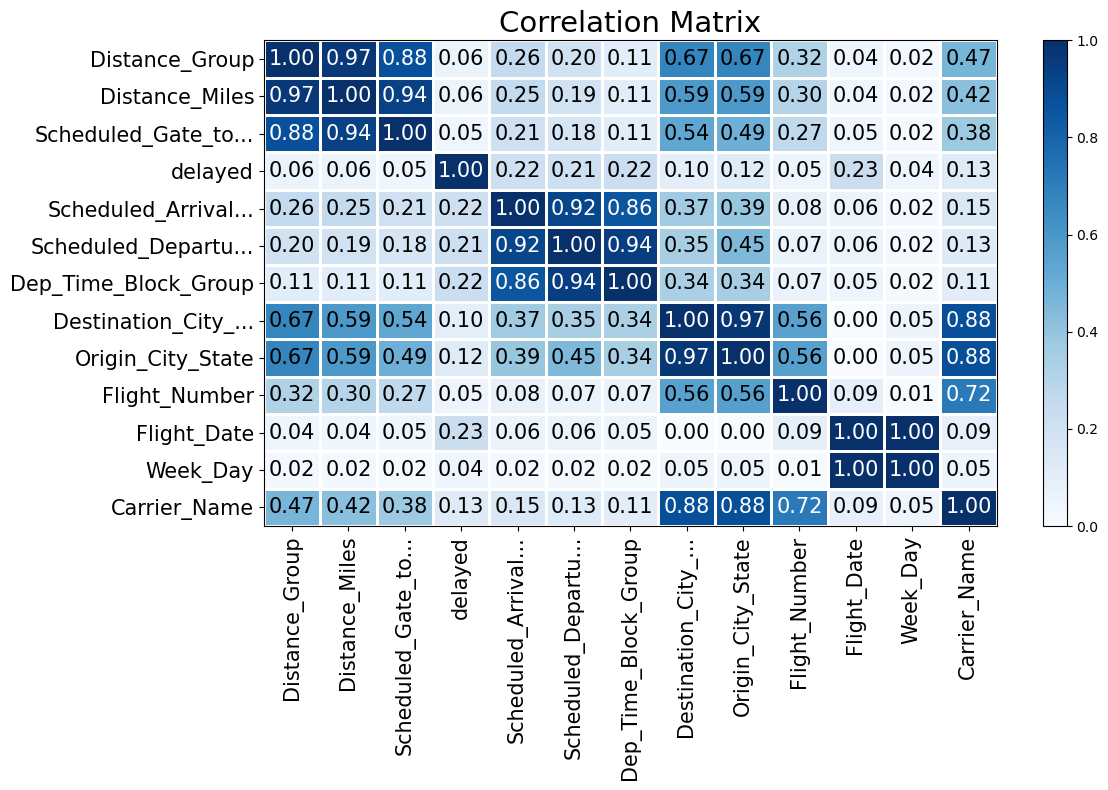

In [88]:
# Phik Correlation Matrix between all variables
corr_matrix = df.phik_matrix()

plot_correlation_matrix(corr_matrix.values, x_labels=corr_matrix.columns, y_labels=corr_matrix.index, vmin=0, vmax=1, 
                       color_map='Blues', title='Correlation Matrix', fontsize_factor=1.5, figsize=(12,8))
plt.tight_layout()

In [89]:
corr_matrix.loc[np.where(corr_matrix>0.8, 1, 0)==1].columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Flight_Number',
       'Origin_City_State', 'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Scheduled_Arrival_Time', 'delayed',
       'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group'],
      dtype='object')

In [123]:
# with the following function we can select highly correlated features 
# it will remove the first feature that is correlated with anything other feature 
def correlation(dataset, threshold): 
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = df.phik_matrix()
    for i in range(len(corr_matrix.columns)):
        for j in range(i): 
            if abs(corr_matrix.iloc[i,j]) > threshold: # We are interested in absolute coeff value
                colname = corr_matrix.columns[i] # Getting name of column
                col_corr.add(colname)
    return col_corr

In [125]:
corr_features = correlation(df, 0.8)
len(set(corr_features))

interval columns not set, guessing: ['Flight_Number', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time', 'delayed', 'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group']


7

In [109]:
corr_features

{'Destination_City_State',
 'Distance_Group',
 'Distance_Miles',
 'Flight_Date',
 'Origin_City_State',
 'Scheduled_Arrival_Time',
 'Scheduled_Departure_Time'}

In [192]:
# Add highly correlated features into a new dataframe 
df_features = pd.DataFrame(data=df[['Carrier_Name', 'Destination_City_State', 'Distance_Group', 'Distance_Miles', 
                           'Flight_Date', 'Origin_City_State', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'delayed']])
df_features

,Carrier_Name,Destination_City_State,Distance_Group,Distance_Miles,Flight_Date,Origin_City_State,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed
0,United Air Lines Inc.,"Newark, NJ",6,1372,2023-04-26,"Dallas/Fort Worth, TX",2359,1926,0
1,United Air Lines Inc.,"Omaha, NE",2,472,2023-04-26,"Denver, CO",2316,2051,1
2,United Air Lines Inc.,"Cleveland, OH",9,2052,2023-04-26,"Los Angeles, CA",701,2328,0
3,United Air Lines Inc.,"Washington, DC",2,413,2023-04-26,"Boston, MA",735,600,0
4,United Air Lines Inc.,"Denver, CO",5,1024,2023-04-26,"Seattle, WA",1459,1116,0
...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,"Washington, DC",2,399,2024-03-29,"Boston, MA",1507,1315,0
6777974,Republic Airline,"Boston, MA",2,399,2024-03-29,"Washington, DC",1802,1620,0
6777975,Republic Airline,"Cincinnati, OH",4,752,2024-03-29,"Boston, MA",1659,1425,0
6777976,Republic Airline,"Boston, MA",4,752,2024-03-29,"Cincinnati, OH",1958,1751,0


In [194]:
# Convert 'Flight_Date' to datetime objects
df_features['Flight_Date'] = pd.to_datetime(df_features['Flight_Date'])

# Extract month and year
df_features['Month'] = df_features['Flight_Date'].dt.month
df_features['Year'] = df_features['Flight_Date'].dt.year
df_features['Day'] = df_features['Flight_Date'].dt.day

In [196]:
df_features

,Carrier_Name,Destination_City_State,Distance_Group,Distance_Miles,Flight_Date,Origin_City_State,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,"Newark, NJ",6,1372,2023-04-26,"Dallas/Fort Worth, TX",2359,1926,0,4,2023,26
1,United Air Lines Inc.,"Omaha, NE",2,472,2023-04-26,"Denver, CO",2316,2051,1,4,2023,26
2,United Air Lines Inc.,"Cleveland, OH",9,2052,2023-04-26,"Los Angeles, CA",701,2328,0,4,2023,26
3,United Air Lines Inc.,"Washington, DC",2,413,2023-04-26,"Boston, MA",735,600,0,4,2023,26
4,United Air Lines Inc.,"Denver, CO",5,1024,2023-04-26,"Seattle, WA",1459,1116,0,4,2023,26
...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,"Washington, DC",2,399,2024-03-29,"Boston, MA",1507,1315,0,3,2024,29
6777974,Republic Airline,"Boston, MA",2,399,2024-03-29,"Washington, DC",1802,1620,0,3,2024,29
6777975,Republic Airline,"Cincinnati, OH",4,752,2024-03-29,"Boston, MA",1659,1425,0,3,2024,29
6777976,Republic Airline,"Boston, MA",4,752,2024-03-29,"Cincinnati, OH",1958,1751,0,3,2024,29


In [198]:
# Drop unnecessary columns from new dataframe 
df_features.drop(['Flight_Date'], axis=1, inplace=True)

In [200]:
df_features

,Carrier_Name,Destination_City_State,Distance_Group,Distance_Miles,Origin_City_State,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,"Newark, NJ",6,1372,"Dallas/Fort Worth, TX",2359,1926,0,4,2023,26
1,United Air Lines Inc.,"Omaha, NE",2,472,"Denver, CO",2316,2051,1,4,2023,26
2,United Air Lines Inc.,"Cleveland, OH",9,2052,"Los Angeles, CA",701,2328,0,4,2023,26
3,United Air Lines Inc.,"Washington, DC",2,413,"Boston, MA",735,600,0,4,2023,26
4,United Air Lines Inc.,"Denver, CO",5,1024,"Seattle, WA",1459,1116,0,4,2023,26
...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,"Washington, DC",2,399,"Boston, MA",1507,1315,0,3,2024,29
6777974,Republic Airline,"Boston, MA",2,399,"Washington, DC",1802,1620,0,3,2024,29
6777975,Republic Airline,"Cincinnati, OH",4,752,"Boston, MA",1659,1425,0,3,2024,29
6777976,Republic Airline,"Boston, MA",4,752,"Cincinnati, OH",1958,1751,0,3,2024,29


In [204]:
# Define categorical and numerical features
categorical_features = ['Carrier_Name', 'Destination_City_State', 'Origin_City_State']
numerical_features = ['Distance_Group', 'Distance_Miles', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'Month', 
                      'Year', 'Day']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Redefine X (features) and y (target) variables
X = df_features[['Carrier_Name', 'Year', 'Month', 'Day', 'Destination_City_State', 'Distance_Miles', 'Origin_City_State', 
             'Distance_Group', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time']]
y = df_features["delayed"]

# Apply the preprocessing pipeline to X
x_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)

print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (5422382, 706)
x_test shape: (1355596, 706)
y_train shape: (5422382,)
y_test shape: (1355596,)
